In [1]:
import pandas as pd

dataset_name = "2019 Stack Overflow Developer Survey"
# Import the Exploratory Data Analysis 2019 Survey
df_2019 = pd.read_csv('survey_results_public_2019.csv')

# Keep only relevant columns in the data frame
df_2019 = df_2019[["Respondent", "MainBranch", "EdLevel", "YearsCode", "YearsCodePro",
                   "OrgSize", "DevType", "ConvertedComp", "WorkRemote", "LanguageWorkedWith"]]

# Preview the first 5 rows of the data
print("Preview of the " + dataset_name)
df_2019.head()

Preview of the 2019 Stack Overflow Developer Survey


,Respondent,MainBranch,EdLevel,YearsCode,YearsCodePro,OrgSize,DevType,ConvertedComp,WorkRemote,LanguageWorkedWith
0,1,I am a student who is learning to code,Primary/elementary school,4,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python
1,2,I am a student who is learning to code,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN,"Developer, desktop or enterprise applications;...",NaN,NaN,C++;HTML/CSS;Python
2,3,"I am not primarily a developer, but I write co...","Bachelor’s degree (BA, BS, B.Eng., etc.)",3,1,100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",8820.0,Less than once per month / Never,HTML/CSS
3,4,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)",3,Less than 1 year,100 to 499 employees,"Developer, full-stack",61000.0,Less than once per month / Never,C;C++;C#;Python;SQL
4,5,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)",16,9,"10,000 or more employees","Academic researcher;Developer, desktop or ente...",NaN,A few days each month,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [2]:
# Get some basic information about the data
print("Basic information about the " + dataset_name)
df_2019.info()

Basic information about the 2019 Stack Overflow Developer Survey
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Respondent          88883 non-null  int64  
 1   MainBranch          88331 non-null  object 
 2   EdLevel             86390 non-null  object 
 3   YearsCode           87938 non-null  object 
 4   YearsCodePro        74331 non-null  object 
 5   OrgSize             71791 non-null  object 
 6   DevType             81335 non-null  object 
 7   ConvertedComp       55823 non-null  float64
 8   WorkRemote          70284 non-null  object 
 9   LanguageWorkedWith  87569 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.8+ MB


In [3]:
# Get some basic descriptive statistics
print("Descriptive statistics for the " + dataset_name)
df_2019.describe()

Descriptive statistics for the 2019 Stack Overflow Developer Survey


,Respondent,ConvertedComp
count,88883.000000,5.582300e+04
mean,44442.000000,1.271107e+05
std,25658.456325,2.841523e+05
min,1.000000,0.000000e+00
25%,22221.500000,2.577750e+04
50%,44442.000000,5.728700e+04
75%,66662.500000,1.000000e+05
max,88883.000000,2.000000e+06


In [4]:
# Find any duplicates
print(dataset_name + " contains " + str(df_2019.duplicated().sum()) + " duplicates")

2019 Stack Overflow Developer Survey contains 0 duplicates


In [5]:
# Find any null values
print("Columns in the " + dataset_name + " and how many null values")
df_2019.isnull().sum()

Columns in the 2019 Stack Overflow Developer Survey and how many null values


Respondent                0
MainBranch              552
EdLevel                2493
YearsCode               945
YearsCodePro          14552
OrgSize               17092
DevType                7548
ConvertedComp         33060
WorkRemote            18599
LanguageWorkedWith     1314
dtype: int64

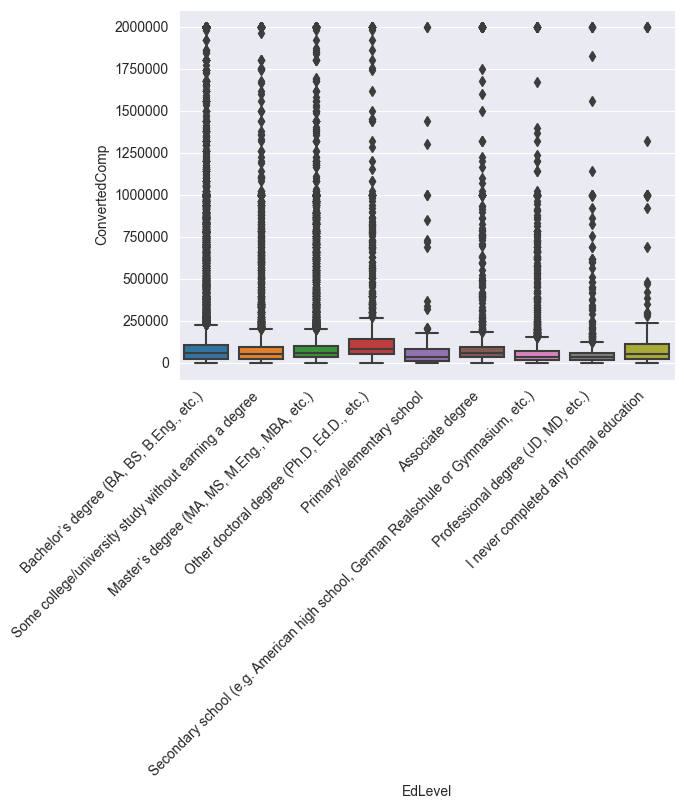

In [18]:
import seaborn as sns
from matplotlib import pyplot

# Create box plot of the data frame in current state ConvertedComp/EdLevel
box_plot_1 = sns.boxplot(df_2019[["EdLevel", "ConvertedComp"]], x="EdLevel", y="ConvertedComp")
box_plot_1.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_1.ticklabel_format(style='plain', axis='y',useOffset=False)

figure_1 = box_plot_1.get_figure()
figure_1.savefig("2019_edlevel_convertedcomp_boxplot.png", bbox_inches="tight")

In [ ]:
# Create box plot of the data frame in current state
box_plot_1 = sns.boxplot(df_2019[["EdLevel", "ConvertedComp"]], x="EdLevel", y="ConvertedComp")
box_plot_1.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_1.ticklabel_format(style='plain', axis='y',useOffset=False)

figure_1 = box_plot_1.get_figure()
figure_1.savefig("2019_edlevel_convertedcomp_boxplot.png", bbox_inches="tight")

In [7]:
from scipy.stats import zscore

# Drop all null values from the ConvertedComp column
df_2019.dropna(subset = ["ConvertedComp"], inplace = True)
df_2019.reset_index(inplace = True)
print(dataset_name + " with null values removed from ConvertedComp\n")
df_2019.describe()

2019 Stack Overflow Developer Survey with null values removed from ConvertedComp



,index,Respondent,ConvertedComp
count,55823.000000,55823.000000,5.582300e+04
mean,44199.032388,44473.482937,1.271107e+05
std,25496.070848,25662.109668,2.841523e+05
min,2.000000,3.000000,0.000000e+00
25%,22064.500000,22183.500000,2.577750e+04
50%,44260.000000,44541.000000,5.728700e+04
75%,66281.500000,66702.500000,1.000000e+05
max,88330.000000,88883.000000,2.000000e+06


In [8]:
# Get the Z Score
z_scores = zscore(df_2019["ConvertedComp"])
print("The Z Scores:")
print(str(z_scores))

The Z Scores:
0       -0.416297
1       -0.232662
2        0.842194
3       -0.112376
4       -0.400555
           ...   
55818    0.010168
55819   -0.157040
55820   -0.205405
55821    1.622036
55822   -0.366693
Name: ConvertedComp, Length: 55823, dtype: float64


In [9]:
# Set the threshold for the Z Score to be 3
threshold = 0.5

# Remove all rows in the data frame if the Z Score is not in threshold
df_2019_no_outliers = df_2019[(abs(z_scores) > threshold)]
df_2019_no_outliers.reset_index(inplace = True)
print(dataset_name + " with no outlier values for ConvertedComp")
df_2019_no_outliers.describe()

2019 Stack Overflow Developer Survey with no outlier values for ConvertedComp


,level_0,index,Respondent,ConvertedComp
count,3917.000000,3917.000000,3917.000000,3.917000e+03
mean,27964.377074,44284.056421,44559.072504,9.836580e+05
std,16061.028226,25411.163785,25576.655712,5.738984e+05
min,2.000000,5.000000,6.000000,2.700000e+05
25%,13941.000000,22034.000000,22152.000000,5.224560e+05
50%,27948.000000,44326.000000,44609.000000,8.640000e+05
75%,41771.000000,66124.000000,66545.000000,1.224000e+06
max,55821.000000,88329.000000,88882.000000,2.000000e+06


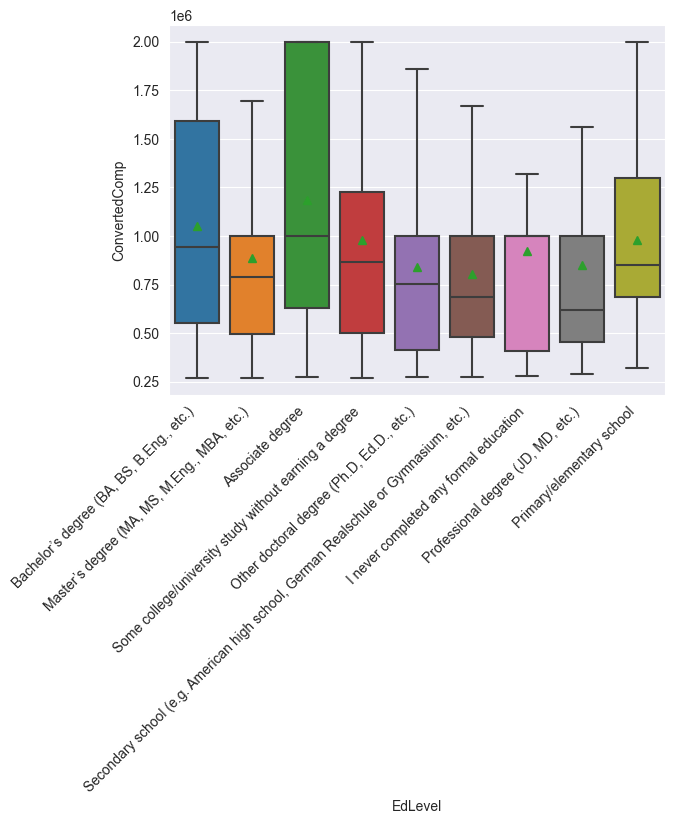

In [10]:
import seaborn as sns
from matplotlib import pyplot

box_plot = sns.boxplot(df_2019_no_outliers, x="EdLevel", y="ConvertedComp", showmeans=True, sym="")
box_plot.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
fig = box_plot.get_figure()
fig.savefig("figure4.png")

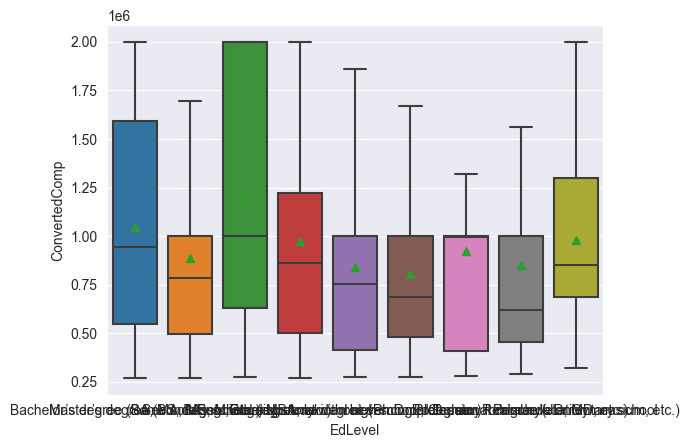

In [11]:
box_plot_1 = sns.boxplot(df_2019_no_outliers, x="EdLevel", y="ConvertedComp", showmeans=True, showfliers=False)
fig = box_plot.get_figure()
fig.savefig("figure2.png")